# Medidas de Tendencia Central

### Media

La media es la suma de todos los elementos $x_i$ de un conjunto $X$, divididos entre el número total de elementos $n$.
$$\\\sum_i^n x_i / n$$

In [1]:
#Función de la media
def media(data):
    return float(sum(data)) / float(len(data))

### Mediana

Es el número intermedio de un grupo de números, es decir, la mitad de los números son superiores a la mediana y la mitad de los números tienen valores menores que la mediana.

In [2]:
#Función de la mediana
def mediana(data):
    ordenados = sorted(data)
    medio = len(ordenados) // 2
    #Si el número de datos es impar, devolvemos el valor de en medio
    if len(data) % 2 != 0:
        return ordenados[medio]
    #Entonces el número de datos es par, devolvemos el promedio
    return (ordenados[medio - 1] + ordenados[medio]) / 2

### Moda

Es el valor que tiene mayor frecuencia absoluta.

In [3]:
#Función de la moda
def moda(data):
    diccionario = []
    max = 0
    temp = 0
    for value in range(0, len(data)):
        temp = data.count(data[value])
        if(temp == max and data[value] not in diccionario):
            diccionario.append(data[value])
        if(temp > max):
            max = temp
            diccionario = []
            diccionario.append(data[value])

    return diccionario

# Medidas de dispersión

### Varianza

Representa la variabilidad de una serie de datos con respecto a su media.

In [4]:
#Función de varianza
#muestral: true para cálculo muestral, false para cálculo poblacional 
def varianza(data, muestral):
    xbarra = media(data)
    numeradores = data.copy()

    for i in range(0, len(numeradores)):
        numeradores[i] = pow(numeradores[i] - xbarra, 2)

    if(muestral):
        return float(sum(numeradores)) / float((len(numeradores) - 1))
    else:
        return float(sum(numeradores)) / float(len(numeradores))

### Desviación estándar

Indica qué ta dispersos están los datos con respecto a la media y con la misma unidad de medida que los datos.

In [5]:
#Función para la desviación estándar
#muestral: true para cálculo muestral, false para cálculo poblacional 
def desv_standar(data, muestral):
    return pow(varianza(data, muestral), 0.5)

### Sesgo

Indica la diferencia entre el valor del estimador esperado y el estimador real.

In [6]:
#Función Sesgo de la Media
#muestral: true para cálculo muestral, false para cálculo poblacional 
def media_sesgo(data, muestral):    
    numeradores = data.copy()
    xbarra = media(numeradores)

    for i in range(0, len(data)):
        numeradores[i] = pow(numeradores[i] - xbarra, 3) * len(numeradores)

    return sum(numeradores) / ((len(numeradores) - 1) * (len(data) - 2) * pow(desv_standar(numeradores, muestral), 3))

### Cuantiles

Son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria. Normalmente se suelen dividir en 4 (cuartiles), 100 (percentiles)

In [7]:
#Función de cuantiles: 
#q es el cuantil por el que quieres partir (4, 10, 100 ,..., n)
#ntil es el cuantil que quieres visualizar, si pones 0, regresa todos los cuantiles
def cuantiles(data, q, ntil):
    ordenados = data.copy()
    ordenados = sorted(ordenados)
    cuantiles = {}

    if(q < ntil):
        return 'Error: la q debe ser igual o mayor al ntil que ocupas'

    for i in range(1, q + 1):
        rango = (float(i) / float(q)) * (len(data) - 1)
        rango_int = int(rango)
        rango_dec = rango % 1

        if rango_dec:
            cuantiles[i] = ordenados[rango_int] + rango_dec * (ordenados[rango_int + 1] - ordenados[rango_int])
        else:
            cuantiles[i] = ordenados[rango_int]

    if ntil == 0:
        return cuantiles
    else:
        return cuantiles[ntil]


### Ejemplos

A continuación, se pondrá una temperatura cualquiera de datos y se mostrará el funcionamiento de las funciones previamente realizadas.

In [8]:
lista = [2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1]

print("Media: " + str(media(lista)))
print("Mediana: " + str(mediana(lista)))
print("Moda: " + str(moda(lista)))
print("Varianza Muestral: " + str(varianza(lista, True)))
print("Varianza Poblacional: " + str(varianza(lista, False)))
print("Desviación estándar Muestral: " + str(desv_standar(lista, True)))
print("Desviación estándar Poblacional: " + str(desv_standar(lista, False)))
print("Sesgo con respecto a la media muestral: " + str(media_sesgo(lista, True)))
print("Sesgo con respecto a la media poblacional: " + str(media_sesgo(lista, False)))
print("Cuartiles: " + str(cuantiles(lista, 4, 0)))


Media: 8.428571428571429
Mediana: 9.0
Moda: [2]
Varianza Muestral: 57.73544973544972
Varianza Poblacional: 55.673469387755084
Desviación estándar Muestral: 7.598384679354535
Desviación estándar Poblacional: 7.461465632686053
Sesgo con respecto a la media muestral: 7.419526283702451e-12
Sesgo con respecto a la media poblacional: 7.835515578945387e-12
Cuartiles: {1: 2.0, 2: 9.0, 3: 11.0, 4: 24}


In [9]:
def Analisis_Descriptivo(lista):
    print("Media: " + str(media(lista)))
    print("Mediana: " + str(mediana(lista)))
    print("Moda: " + str(moda(lista)))
    print("Varianza Muestral: " + str(varianza(lista, True)))
    print("Varianza Poblacional: " + str(varianza(lista, False)))
    print("Desviación estándar Muestral: " + str(desv_standar(lista, True)))
    print("Desviación estándar Poblacional: " + str(desv_standar(lista, False)))
    print("Sesgo con respecto a la media muestral: " + str(media_sesgo(lista, True)))
    print("Sesgo con respecto a la media poblacional: " + str(media_sesgo(lista, False)))
    print("Cuartiles: " + str(cuantiles(lista, 4, 0)))

# Estadísticos descriptivos de la generación de energía de una Planta Solar en México

Una vez elegido el set de datos, hablaremos de cada una de las variables que analizaremos a lo largo del curso.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [11]:
def line_plotting(title, data, x, y, x_label, y_label, width, height):
    """General function to plot"""
    plt.figure(figsize=(width,height))
    plt.plot(data[x], data[y], color='blue')    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [12]:
def bar_plotting(title, data, x, y, x_label, y_label, width, height):
    plt.figure(figsize=(width,height))
    plt.bar(data[x], data[y], color='blue')    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [13]:
def hist_plotting(title, data, x_label, y_label, width, height):
    plt.figure(figsize=(width,height))
    plt.hist(data.values, color='lightblue')
    plt.axvline(
        x = data.values.mean(),
        c = '#ff0000',
        label = '$\\bar{x}$'
    )    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [14]:
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Limpio.xlsx")
datosGeneracion.head()

,Fecha,Anio,Mes,NumMes,Dia,NumDia,Hora,NumHora,Generacion,Temperatura,...,DireccionViento,CoberturaNubes,IndiceUV,CodCondCielo,DesCondCielo,CodDirViento,DesDirViento,VelocidadRafaga,Precipitacion,DPT
0,2021-07-01 00:00:00,2021,199,7,6026,1,144600,0,0.0,19.0,...,0.0,70,0,4,Cielo nublado,4,Sureste,17.0,0.0,15.0
1,2021-07-01 01:00:00,2021,199,7,6026,1,144601,1,0.0,18.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,15.0,0.0,15.0
2,2021-07-01 02:00:00,2021,199,7,6026,1,144602,2,0.0,18.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,15.0
3,2021-07-01 03:00:00,2021,199,7,6026,1,144603,3,0.0,18.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,16.0
4,2021-07-01 04:00:00,2021,199,7,6026,1,144604,4,0.0,17.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,11.0,0.0,14.0


### Fechas

Antes de iniciar con las columnas consideradas como variables, debo comentar que hay un conjunto de columnas que se consideran "fechas", en el sentido que no se analizarán como tal, sino que serán eje o auxiliares en el análisis como series de tiempo tanto de las variables dependientes, como de las independientes. Estas columnas son:

- **Fecha**: Columna DateTime con formato yyyy-MM-dd HH:mm:ss
- **Anio**: Columna con el número de año de la observación
- **Mes**: Código de mes (iniciando en 199, que es Julio en la Base de Datos origen), que es secuencial ascendente.
- **NumMes**: Número del mes que representa en el año (Ej: 7 = Julio)
- **Dia**: Código del día iniciando por el día 6026, proviene de la base de datos origen, de manera secuencial ascendente.
- **NumDia**: Número del Día que representa en el mes (del 1 al 31)
- **Hora**: Código de la hora iniciando con 144600, proviene de la base de datos origen, de manera secuencial ascendente.
- **NumHora**: Número de la Hora que representa en el día (del 0 al 23)

### Generación

Variable dependiente que representa la cantidad de kWh que generaron los paneles solares en cada hora (observación) durante un periodo de 2 años. Esta variable es la que analizaremos y predeciremos el comportamiento. A continuación se muestra la gráfica con 240 observaciones para una mejor apreciación del comportamiento.

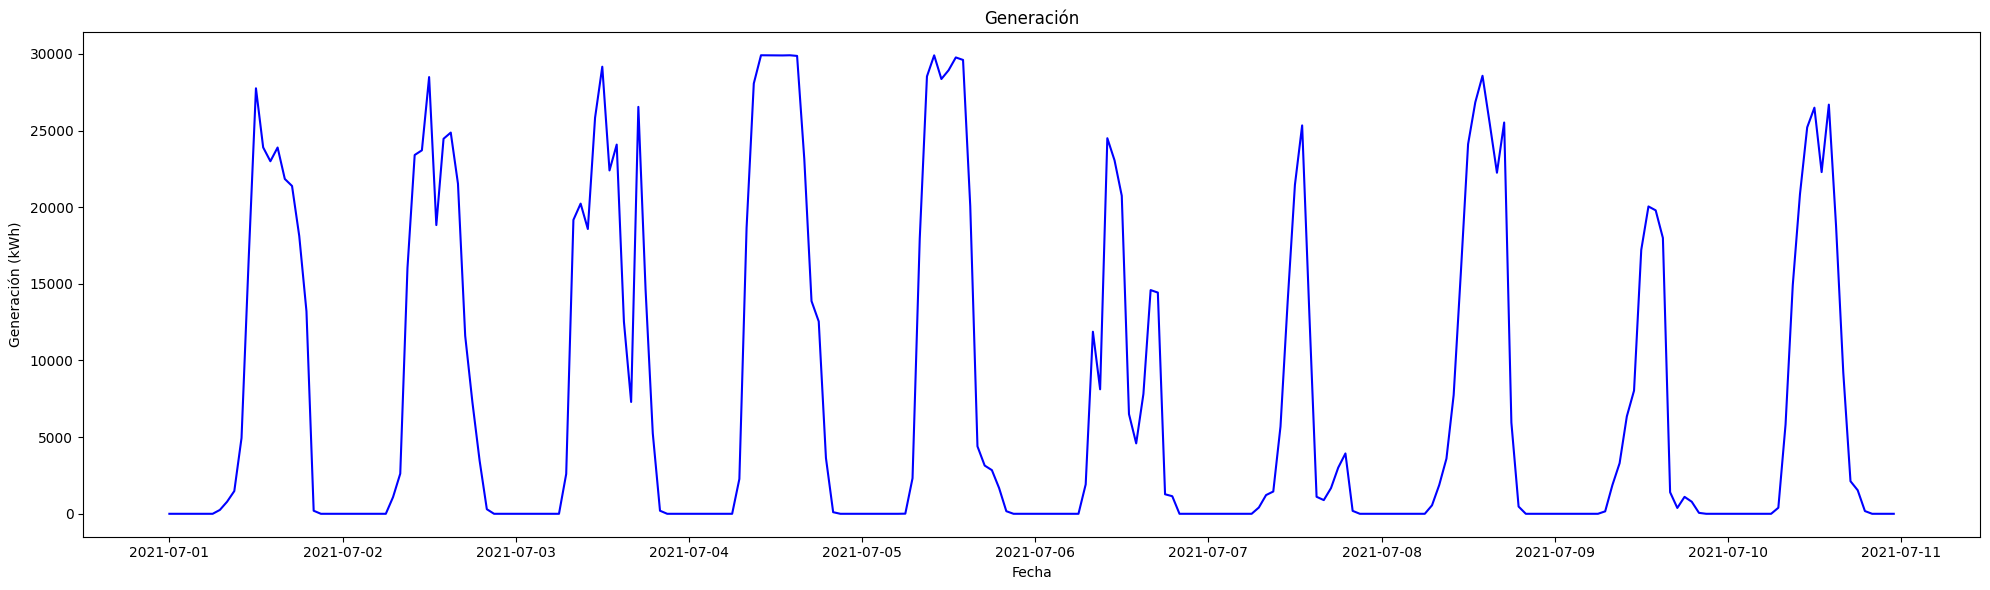

In [15]:
#Graficaremos 240 horas para una mejor apreciac
line_plotting('Generación', datosGeneracion[:240], 'Fecha', 'Generacion', 'Fecha', 'Generación (kWh)', 20, 6)

Como podemos observar, esta variable tiene un comportamiento cíclico y repetitivo por día, ya que en las horas más altas del día, se presenta una mayor generación que durante la noche. Para eliminar este comportamiento, usaremos el método diferencial, el cuál restaremos cada valor con su anterior del ciclo inmediato.

In [16]:
datosGeneracion["Generacion_diff"] = datosGeneracion["Generacion"].diff(periods=24)

Ahora vamos a graficarlo.

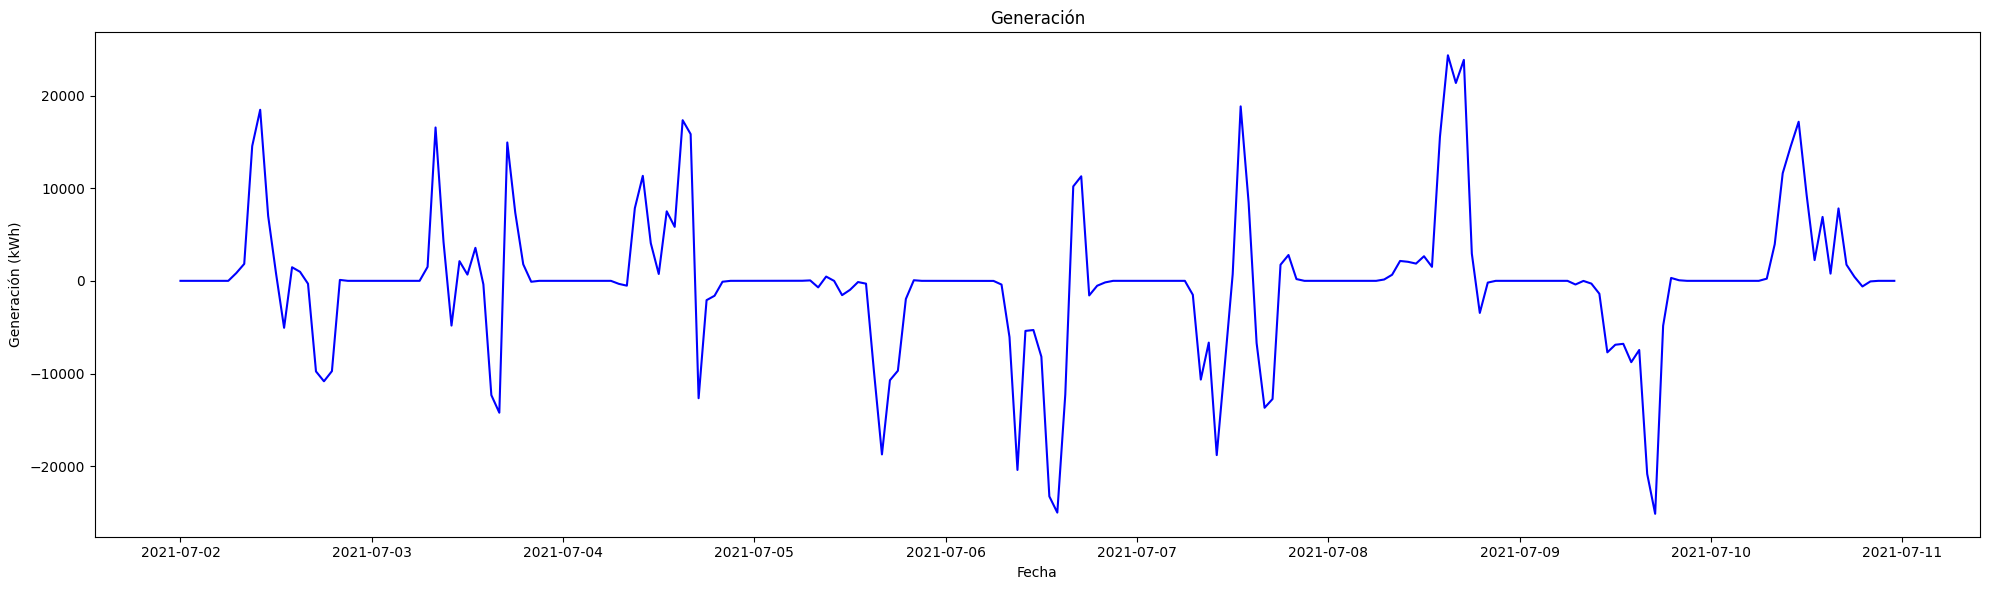

In [17]:
#Graficaremos 240 horas para una mejor apreciación
line_plotting('Generación', datosGeneracion[:240], 'Fecha', 'Generacion_diff', 'Fecha', 'Generación (kWh)', 20, 6)

Con esto se elimina el ciclo diario y podemos evaluar la correlación de esta variable con sus variables independientes. Se aprecia mejor observando la gráfica completa.

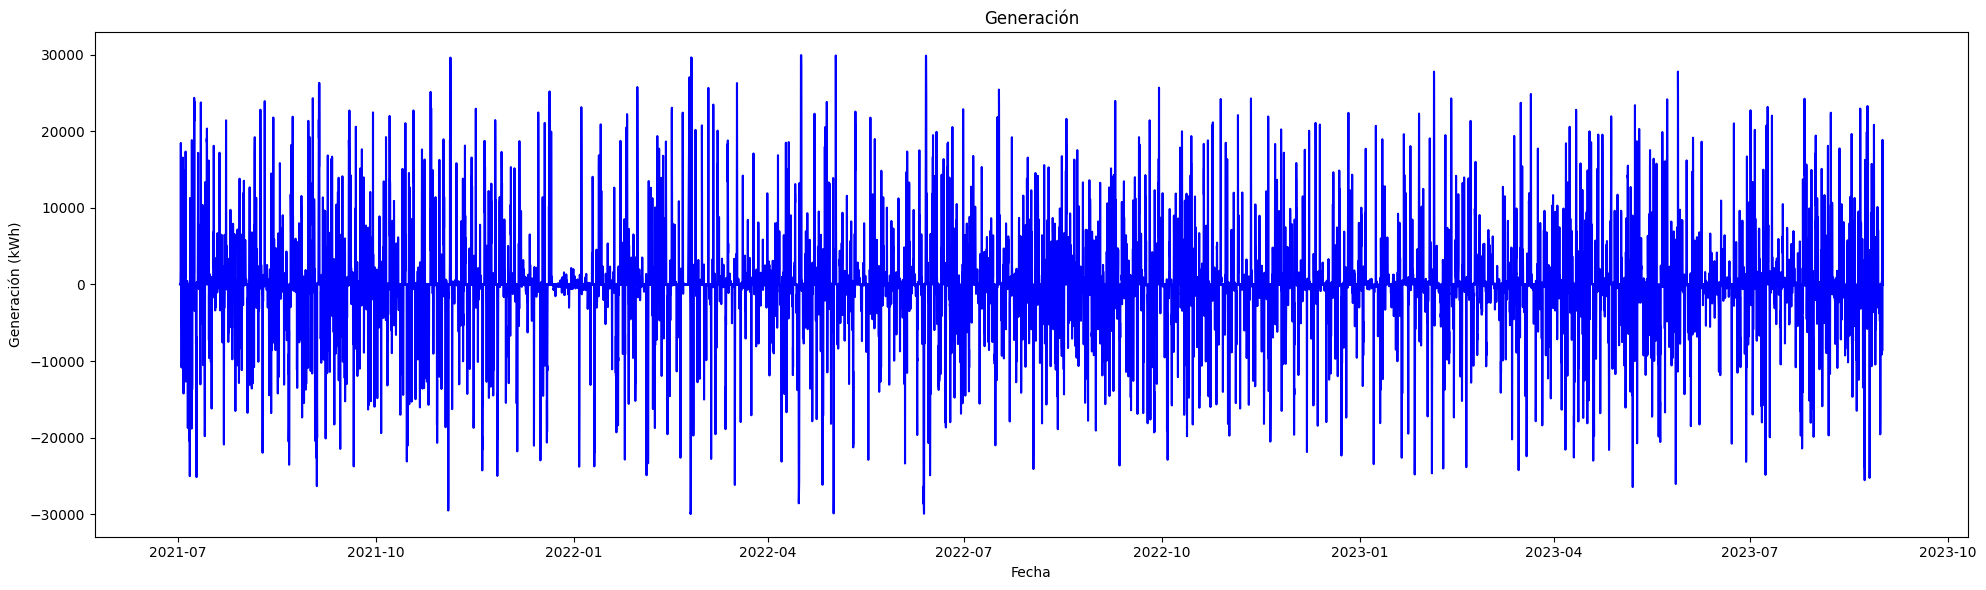

In [18]:
line_plotting('Generación', datosGeneracion, 'Fecha', 'Generacion_diff', 'Fecha', 'Generación (kWh)', 20, 6)

Se muestran ahora las mediciones descriptivas:

In [19]:
Analisis_Descriptivo(datosGeneracion['Generacion'].to_list())

Media: 9748.432925108207
Mediana: 371.2202
Moda: [0.0]
Varianza Muestral: 146205533.75508687
Varianza Poblacional: 146197816.79458043
Desviación estándar Muestral: 12091.548029722533
Desviación estándar Poblacional: 12091.228919947733
Sesgo con respecto a la media muestral: 5.619377629311374e-39
Sesgo con respecto a la media poblacional: 5.619822558193598e-39
Cuartiles: {1: 0.0, 2: 371.2202, 3: 23559.494075000002, 4: 29966.1386}


### Temperatura

Esta columna es numérica y representa la temperatura ambiental presentada durante la observación (hora).

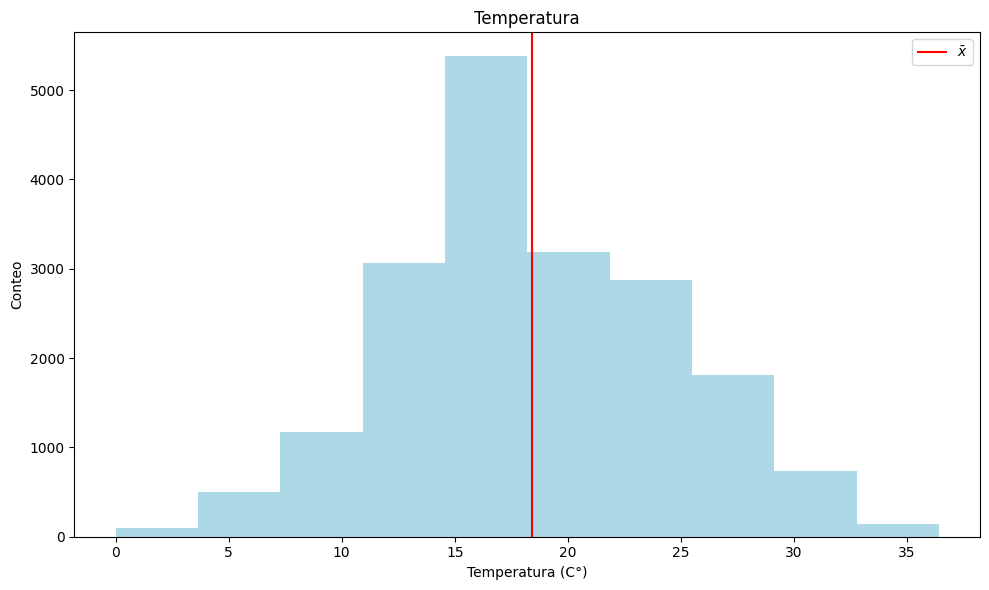

Media: 18.43295682465961
Mediana: 18.0
Moda: [17.0]
Varianza Muestral: 36.75997792339338
Varianza Poblacional: 36.75803767331825
Desviación estándar Muestral: 6.063000735889233
Desviación estándar Poblacional: 6.0628407263689725
Sesgo con respecto a la media muestral: 1.1486762470607673e-20
Sesgo con respecto a la media poblacional: 1.1487671964990074e-20
Cuartiles: {1: 14.4, 2: 18.0, 3: 22.9, 4: 36.4}


In [20]:
hist_plotting('Temperatura', datosGeneracion['Temperatura'], 'Temperatura (C°)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['Temperatura'].to_list())

La Temperatura parece tener el comportamiento de una distribución normal, puesto que el promedio se encuentra en el centro y es donde se encuentra la mayor distribución de los datos.

### Probabilidad de Lluvia

Esta columna es numérica y representa la probabilidad del 0 al 100 de que llueva en la ciudad donde se encuentra la planta solar.

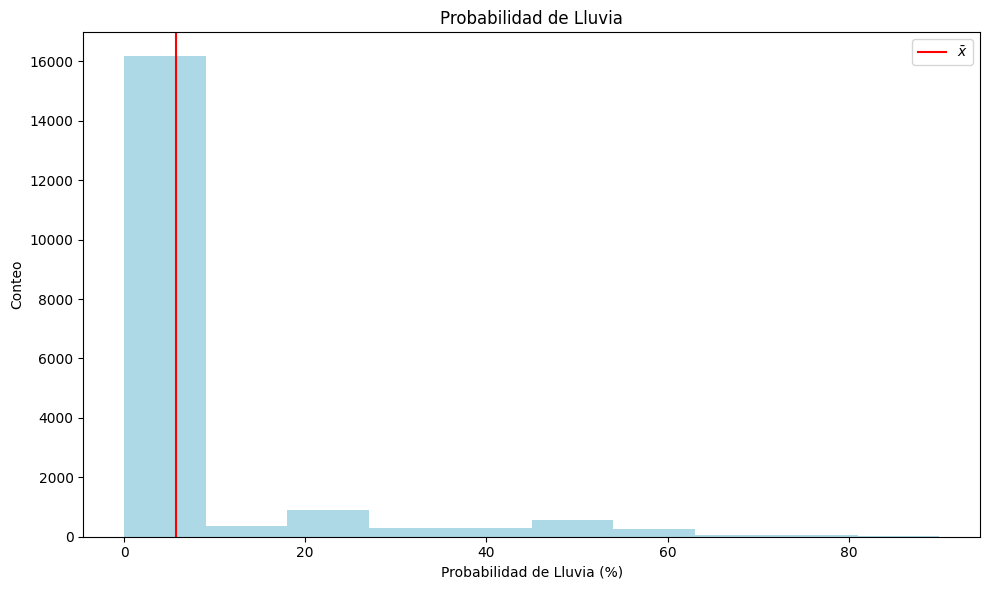

Media: 5.754090573208065
Mediana: 0.0
Moda: [0]
Varianza Muestral: 191.1403171275928
Varianza Poblacional: 191.13022843778347
Desviación estándar Muestral: 13.825350524583193
Desviación estándar Poblacional: 13.824985657778582
Sesgo con respecto a la media muestral: 2.3882963747691918e-23
Sesgo con respecto a la media poblacional: 2.3884854743646515e-23
Cuartiles: {1: 0.0, 2: 0.0, 3: 2.0, 4: 90}


In [21]:
hist_plotting('Probabilidad de Lluvia', datosGeneracion['ProbabilidadLluvia'], 'Probabilidad de Lluvia (%)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['ProbabilidadLluvia'].to_list())

Los datos aparentemente pueden representar una distribución exponencial, ya que tanto la media como la moda de los datos se encuentran casi en el extremo, indicando que en la mayor parte del tiempo en la ciudad de la planta, no existe una probabilidad de lluvia, lo cual es bueno, considerando que se necesita sol para una buena generación energética.

### Humedad Relativa

Esta columna es numérica y representa el porcentaje del 0 al 100 de la humedad relativa que se presenta en la planta.

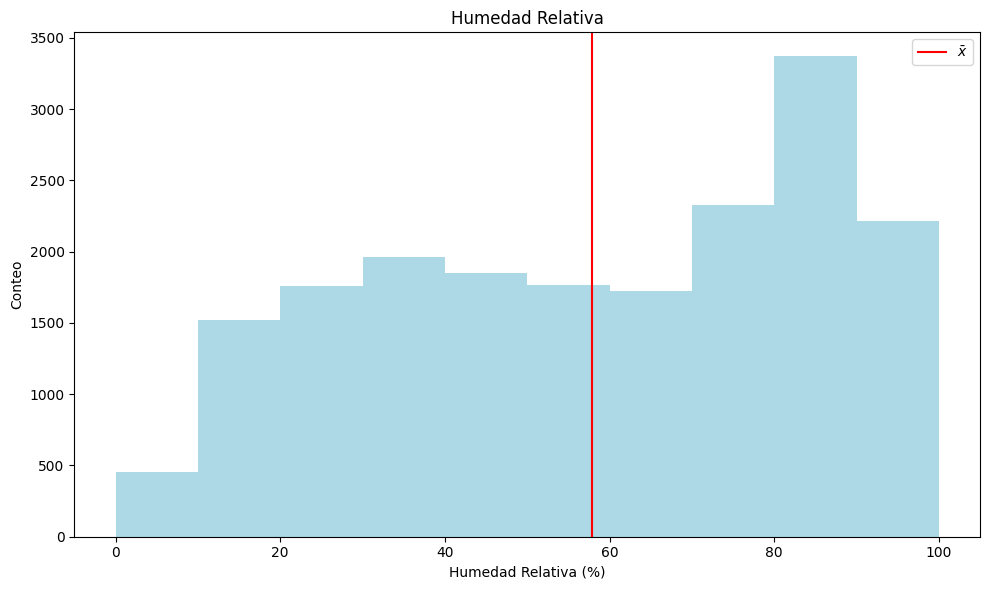

Media: 57.84229916605094
Mediana: 60.0
Moda: [100.0]
Varianza Muestral: 725.2362977803507
Varianza Poblacional: 725.1980186555866
Desviación estándar Muestral: 26.930211617815978
Desviación estándar Poblacional: 26.929500898746465
Sesgo con respecto a la media muestral: -1.063828982184049e-23
Sesgo con respecto a la media poblacional: -1.0639132136187635e-23
Cuartiles: {1: 35.0, 2: 60.0, 3: 82.0, 4: 100.0}


In [22]:
hist_plotting('Humedad Relativa', datosGeneracion['HumedadRelativa'], 'Humedad Relativa (%)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['HumedadRelativa'].to_list())

Las observaciones que se muestran se ven muy uniformes, por lo que indica que en la ciudad donde se encuentra la planta puede haber humedad o no, solo con ver esta variable por sí sola, puedo saber que es probable que no sirva para el análisis del modelo completo, más no sacaremso conclusiones prematuras hasta analizar todas las variables en conjunto.

### Velocidad del Viento

Esta columna es numérica y representa la velocidad en $\frac{km}{h}$ del viento.

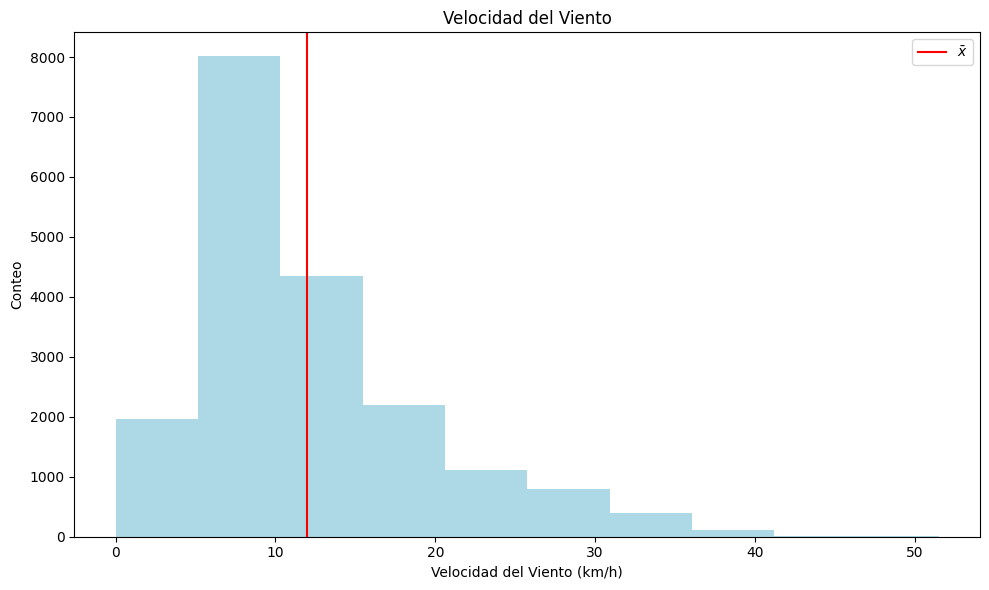

Media: 11.975530454977337
Mediana: 9.4
Moda: [7.0]
Varianza Muestral: 54.79093987431623
Varianza Poblacional: 54.78804792140404
Desviación estándar Muestral: 7.402090236839607
Desviación estándar Poblacional: 7.401894887216654
Sesgo con respecto a la media muestral: 5.143502737339563e-21
Sesgo con respecto a la media poblacional: 5.143909987585872e-21
Cuartiles: {1: 7.0, 2: 9.4, 3: 15.1, 4: 51.5}


In [23]:
hist_plotting('Velocidad del Viento', datosGeneracion['VelocidadViento'], 'Velocidad del Viento (km/h)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['VelocidadViento'].to_list())

Con la gráfica podemos ver que aparenta ser una distribución Weibull, ya que la media y la moda se encuentran sesgados hacia un lado y no hacia el centro de los datos. En general en la Ciudad se observa poca velocidad del viento, lo cual permite que el panel reciba mejor la radiación.

### Dirección del Viento

Esta columna es numérica y va de 0 a 360 grados, donde el Norte es 0 grados y el Sur 180, que representa la dirección en grados del viento.

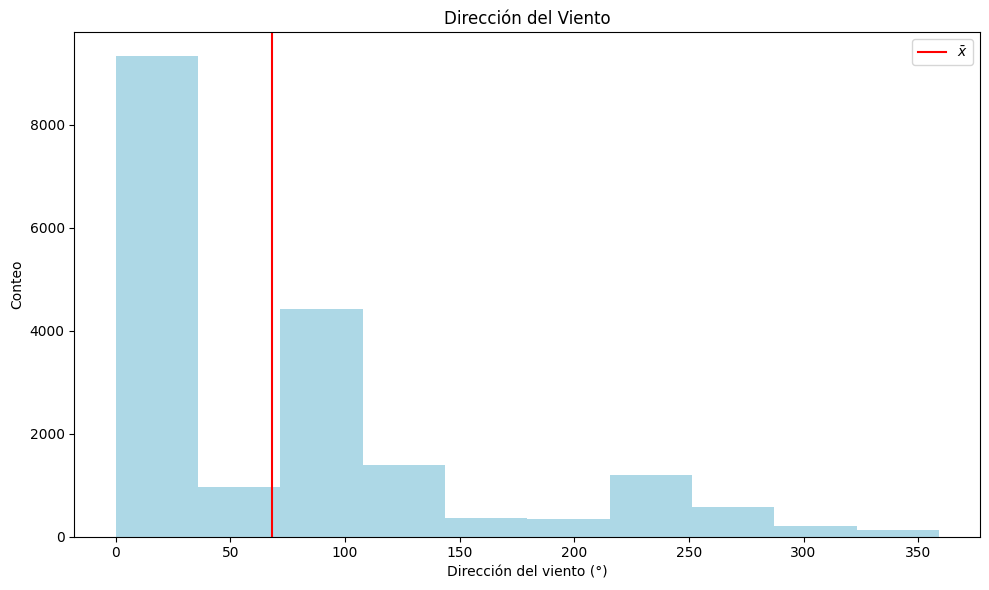

Media: 68.35927372532461
Mediana: 47.0
Moda: [0.0]
Varianza Muestral: 7168.342714996305
Varianza Poblacional: 7167.964358471709
Desviación estándar Muestral: 84.66606590007773
Desviación estándar Poblacional: 84.66383146581371
Sesgo con respecto a la media muestral: 5.016417780309576e-27
Sesgo con respecto a la media poblacional: 5.016814968272904e-27
Cuartiles: {1: 0.0, 2: 47.0, 3: 102.0, 4: 359.0}


In [24]:
hist_plotting('Dirección del Viento', datosGeneracion['DireccionViento'], 'Dirección del viento (°)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['DireccionViento'].to_list())

La gráfica indica que durante la mayor parte del tiempo la dirección del Viento va al Norte, que igual podemos comparar con la variable categórica de la dirección del viento, de la cual hablaremos más adelante. En este caso la media está movida porque la gama de opciones es más amplia.

### Categórica de Dirección del Viento

Para este caso, hay dos columnas que representan este dato, uno es donde se muestra la descripción y otro del código que lo identifica. A continuación indico la simbología:

1. Norte
2. Noreste
3. Este
4. Sureste
5. Sur
6. Suroeste
7. Oeste
8. Noroeste
9. Sin Dirección (Caso atípico)

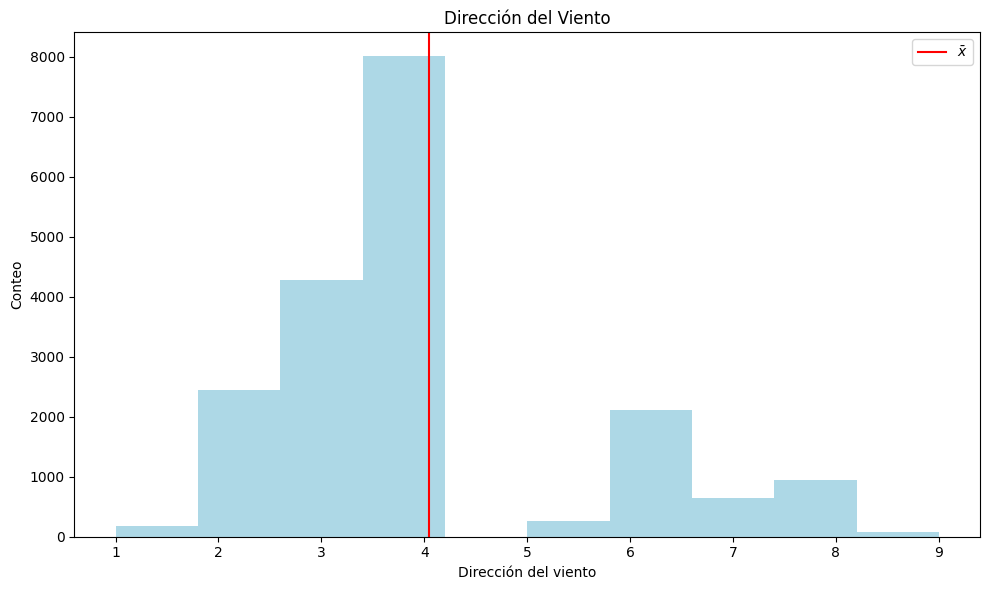

Media: 4.0428586509025655
Mediana: 4.0
Moda: [4]
Varianza Muestral: 2.486207377960705
Varianza Poblacional: 2.486076151982769
Desviación estándar Muestral: 1.5767711875731065
Desviación estándar Poblacional: 1.5767295747790009
Sesgo con respecto a la media muestral: 1.1360421106550685e-16
Sesgo con respecto a la media poblacional: 1.1361320597526016e-16
Cuartiles: {1: 3.0, 2: 4.0, 3: 4.0, 4: 9}


In [25]:
hist_plotting('Dirección del Viento', datosGeneracion['CodDirViento'], 'Dirección del viento', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['CodDirViento'].to_list())

Como se puede observar, este dato contradice completamente a lo que indica en grados la variable anterior, ya que aquí se indica que el viento va hacia el Sur, considerando esto, podemos quizá descartar estas opciones, nuevamente, no adelantaremos conclusiones hasta analizar más a fondo qué variable es más significativa para la Generación.

### Cobertura de Nubes

Esta columna es numérica y representa el porcentaje de 0 a 100 de la nubosidad en el cielo.

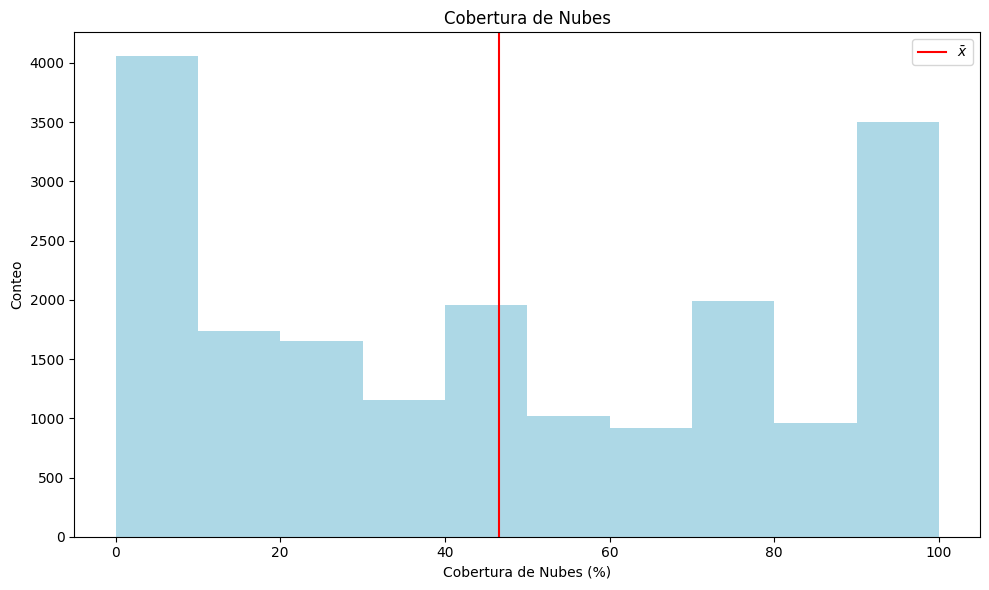

Media: 46.55922094373483
Mediana: 45.0
Moda: [0]
Varianza Muestral: 1223.571604861597
Varianza Poblacional: 1223.507022807081
Desviación estándar Muestral: 34.97958840326165
Desviación estándar Poblacional: 34.97866525193723
Sesgo con respecto a la media muestral: 2.2706889573651576e-24
Sesgo con respecto a la media poblacional: 2.2708687450865607e-24
Cuartiles: {1: 12.0, 2: 45.0, 3: 77.0, 4: 100}


In [26]:
hist_plotting('Cobertura de Nubes', datosGeneracion['CoberturaNubes'], 'Cobertura de Nubes (%)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['CoberturaNubes'].to_list())

Los datos se ven uniformemente repartidos, salvo por los datos de los extremos 0 y 100%, por eso la media se conserva justo en medio y la mediana de los datos también se encuentra semejante.

### Índice UV

Columna numérica que representa la intensidad de radiación ultravioleta proveniente del sol en una escala que inicia en 0.

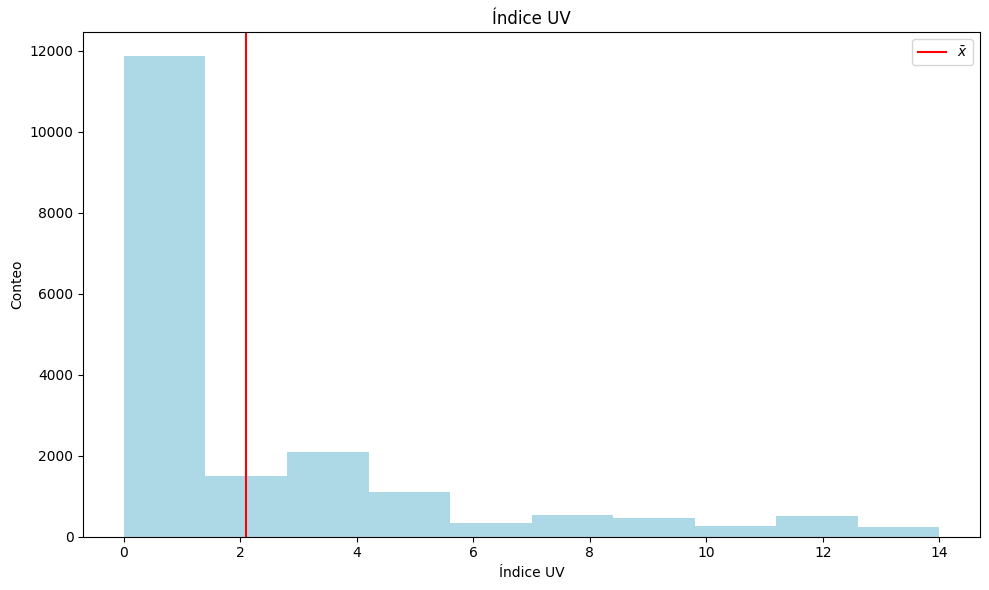

Media: 2.0947957352475455
Mediana: 0.0
Moda: [0]
Varianza Muestral: 10.89753216466212
Varianza Poblacional: 10.896956975589775
Desviación estándar Muestral: 3.3011410398015593
Desviación estándar Poblacional: 3.301053918915863
Sesgo con respecto a la media muestral: 6.324020904721804e-19
Sesgo con respecto a la media poblacional: 6.324521625573456e-19
Cuartiles: {1: 0.0, 2: 0.0, 3: 3.0, 4: 14}


In [27]:
hist_plotting('Índice UV', datosGeneracion['IndiceUV'], 'Índice UV', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['IndiceUV'].to_list())

Estos datos realmente no nos dicen nada, en el sentido de considerar que durante la noche no existe el Índice UV, por lo que se espera que la moda de los datos sea 0, analizaremos más adelante la afectación del Índice UV con respecto a la variable dependiente.

### Condición del Cielo

La condición del cielo indica, de acuerdo al reporte del clima y de manera descriptiva, las cobertura de las nubes. A continuación enlisto las categorías:

1. Despejado
2. Poco Nuboso
3. Medio nublado
4. Cielo nublado
5. Cielo cubierto

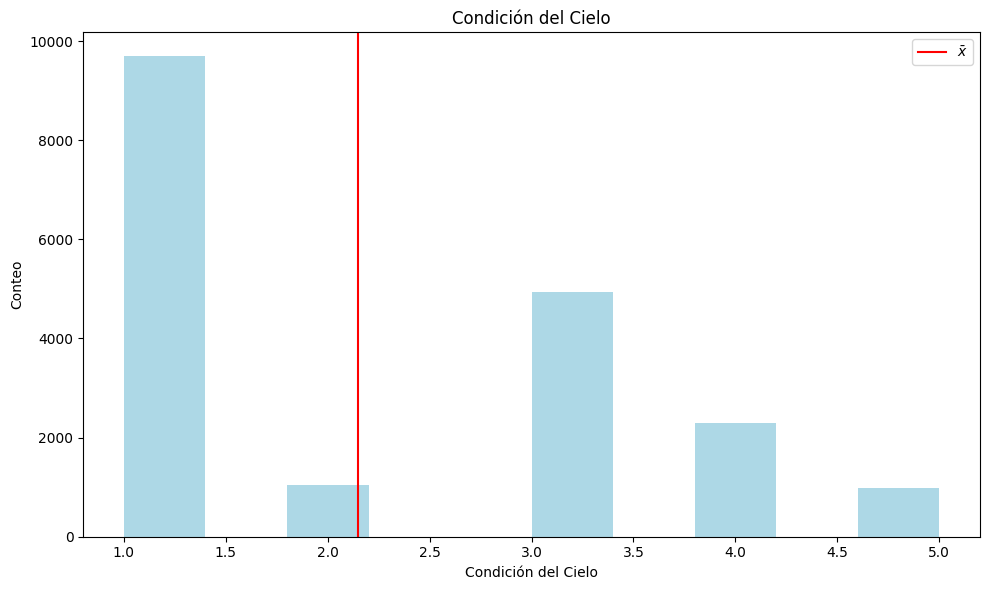

Media: 2.146943945951652
Mediana: 1.0
Moda: [1]
Varianza Muestral: 1.7018162076791163
Varianza Poblacional: 1.7017263831141591
Desviación estándar Muestral: 1.304536778967583
Desviación estándar Poblacional: 1.3045023507507219
Sesgo con respecto a la media muestral: 1.0925732599472275e-15
Sesgo con respecto a la media poblacional: 1.092659767285115e-15
Cuartiles: {1: 1.0, 2: 1.0, 3: 3.0, 4: 5}


In [28]:
hist_plotting('Condición del Cielo', datosGeneracion['CodCondCielo'], 'Condición del Cielo', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['CodCondCielo'].to_list())

Observamos que la mayor parte del tiempo el cielo se contempla despejado, lo cual es bueno considerando que se necesita la ausencia de nubes para un mejor rendimiento del panel, lo cuál se comprobará más adelante.

### Precipitación

Columna numérica que indica la cantidad en mm de agua que presenta el ambiente.

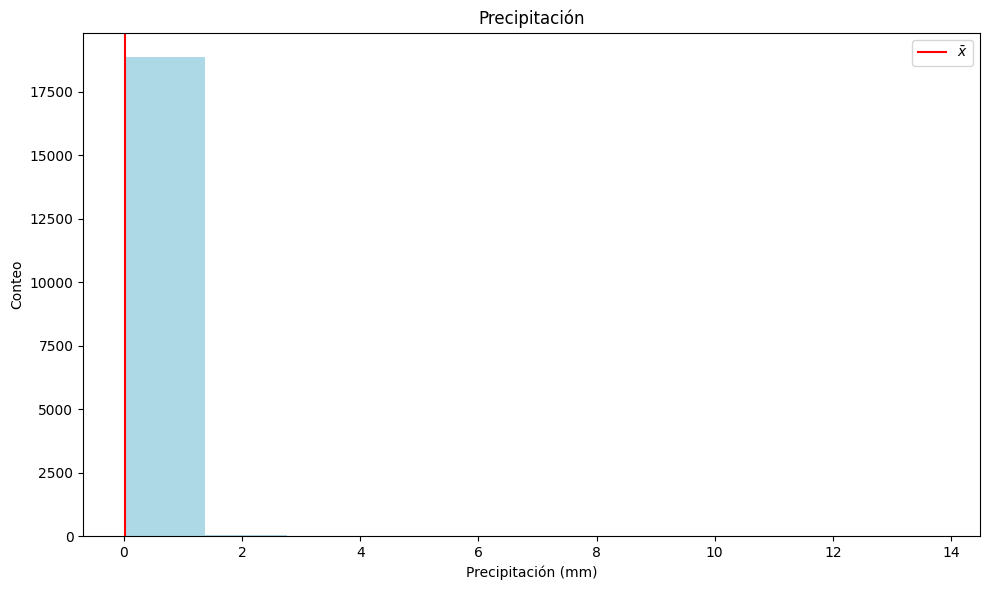

Media: 0.022228438720574298
Mediana: 0.0
Moda: [0.0]
Varianza Muestral: 0.06940455610014075
Varianza Poblacional: 0.06940089281733171
Desviación estándar Muestral: 0.26344744466428355
Desviación estándar Poblacional: 0.26344049198506236
Sesgo con respecto a la media muestral: 3.1733049498074297e-18
Sesgo con respecto a la media poblacional: 3.1735562045045523e-18
Cuartiles: {1: 0.0, 2: 0.0, 3: 0.0, 4: 13.8}


In [29]:
hist_plotting('Precipitación', datosGeneracion['Precipitacion'], 'Precipitación (mm)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['Precipitacion'].to_list())

Puede que estos datos estén mal capturados, porque con lo que hemos observado en otras variables, sí ha habido condiciones de lluvia, por lo que la precipitación no tendría que ser prácticamente 0.

### Temperatura del punto de rocío

Columna numérica que indica la temperatura del punto de rocío, que es aquella temperatura a la cual el vapor de agua presente en una mezcla de gases se condensa cuando la mezcla se enfría a presión constante.

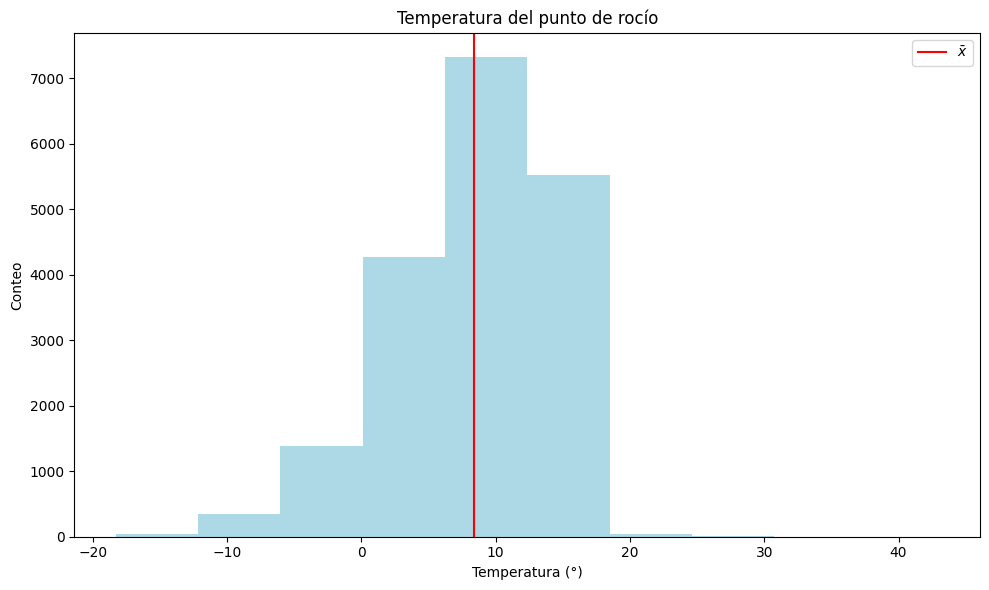

Media: 8.41717724057848
Mediana: 9.7
Moda: [14.0]
Varianza Muestral: 34.54341638631944
Varianza Poblacional: 34.54159312988609
Desviación estándar Muestral: 5.87736474844972
Desviación estándar Poblacional: 5.877209638075375
Sesgo con respecto a la media muestral: -1.853323064538137e-20
Sesgo con respecto a la media poblacional: -1.8534698062262558e-20
Cuartiles: {1: 5.0, 2: 9.7, 3: 13.0, 4: 43.0}


In [30]:
hist_plotting('Temperatura del punto de rocío', datosGeneracion['DPT'], 'Temperatura (°)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['DPT'].to_list())

El comportamiento hace sentido ya que a temperaturas bajas hay más humedad y provoca el punto de rocío.

## Matriz de Correlación

A continuación analizaremos los datos de manera conjunta.

In [31]:
generacion_corr = datosGeneracion[['Generacion', 'Temperatura', 'ProbabilidadLluvia',
                                   'HumedadRelativa', 'VelocidadViento', 'DireccionViento', 'CoberturaNubes',
                                   'IndiceUV', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga', 'Precipitacion', 'DPT']].corr('pearson')

In [34]:
generacion_corr.style.background_gradient(cmap='Greens', axis=0)

,Generacion,Temperatura,ProbabilidadLluvia,HumedadRelativa,VelocidadViento,DireccionViento,CoberturaNubes,IndiceUV,CodCondCielo,CodDirViento,VelocidadRafaga,Precipitacion,DPT
Generacion,1.000000,0.555309,-0.093045,-0.525581,0.173578,0.018556,-0.215624,0.790079,-0.241022,0.004234,0.082047,-0.043639,-0.191201
Temperatura,0.555309,1.000000,0.034126,-0.703548,0.503658,0.077136,-0.126558,0.515748,-0.151449,-0.022551,0.374257,-0.012504,-0.052723
ProbabilidadLluvia,-0.093045,0.034126,1.000000,0.200223,-0.019695,-0.279269,0.254870,-0.019791,0.469808,-0.056695,-0.030994,-0.004378,0.309922
HumedadRelativa,-0.525581,-0.703548,0.200223,1.000000,-0.414636,-0.280276,0.302339,-0.433177,0.400004,-0.224533,-0.383739,0.058977,0.626413
VelocidadViento,0.173578,0.503658,-0.019695,-0.414636,1.000000,0.058960,-0.022465,0.117234,-0.059810,-0.060579,0.836505,0.010285,-0.098860
DireccionViento,0.018556,0.077136,-0.279269,-0.280276,0.058960,1.000000,0.008021,-0.015898,-0.265847,0.359970,-0.111415,0.056439,-0.456204
CoberturaNubes,-0.215624,-0.126558,0.254870,0.302339,-0.022465,0.008021,1.000000,-0.209237,0.546936,-0.094604,-0.065419,0.063967,0.227896
IndiceUV,0.790079,0.515748,-0.019791,-0.433177,0.117234,-0.015898,-0.209237,1.000000,-0.167761,-0.038271,0.048062,-0.037750,-0.099950
CodCondCielo,-0.241022,-0.151449,0.469808,0.400004,-0.059810,-0.265847,0.546936,-0.167761,1.000000,-0.130394,-0.030265,0.093907,0.361868
CodDirViento,0.004234,-0.022551,-0.056695,-0.224533,-0.060579,0.359970,-0.094604,-0.038271,-0.130394,1.000000,0.042748,-0.030994,-0.349453


## Prueba de hipótesis

Vamos a realizar una prueba de hipótesis para verificar si el dato ya diferenciado de la generación, corresponde a una distribución normal con media 0.

Primero, observaremos los datos estadísticos descriptivos de esta variable.

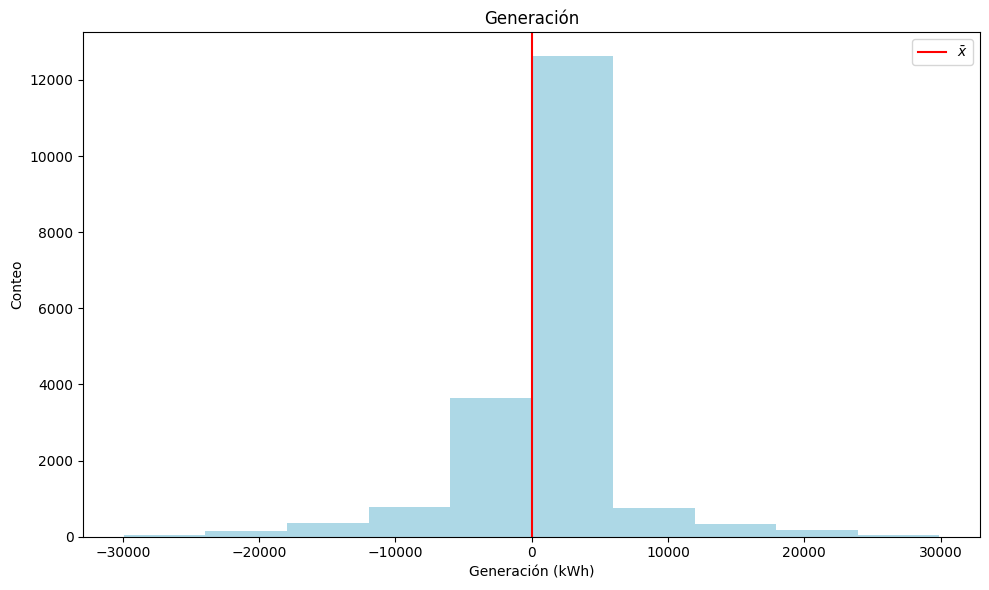

Media: 1.525839129056111
Mediana: 0.0
Moda: [0.0]
Varianza Muestral: 27426339.794395033
Varianza Poblacional: 27424890.35248644
Desviación estándar Muestral: 5237.0163064855005
Desviación estándar Poblacional: 5236.877920334447
Sesgo con respecto a la media muestral: 2.818940635468904e-40
Sesgo con respecto a la media poblacional: 2.8191641155609715e-40
Cuartiles: {1: -35.321624999998676, 2: 0.0, 3: 13.173350000000937, 4: 29901.3778}


In [62]:
hist_plotting('Generación', datosGeneracion['Generacion_diff'].dropna(), 'Generación (kWh)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['Generacion_diff'].dropna().to_list())

In [65]:
from scipy import stats
from scipy.stats import ttest_1samp

ttest_1samp(datosGeneracion["Generacion_diff"].dropna(), popmean=0).pvalue

0.9680311948121709

Consideremos que

$H_0: Distribución\;Normal\;con\;\mu=0$<br>
$H_a: Distribución\;Normal\;con\;\mu\neq 0\;o\;que\;no\;pertenece\;a\;una\;Distribución\;Normal$<br>
<br>
$\therefore\;Con\;un\;95\%\;de\;confianza,\;$<br>
$No\;se\;rechaza\;la\;hipótesis\;nula\;lo\;cual\;significa\;que\;la\;generación\;diferenciada\;es\;una\;Distribución\;Normal\;con\;\mu=0.$